In [1]:
from TOVdev import *
import matplotlib 
import matplotlib.pyplot as plt
import scipy.constants as cst
import numpy as np

from tqdm import tqdm

from lal import  C_SI, HBAR_SI, H_SI, G_SI, MSUN_SI
M_sun = MSUN_SI

import pickle
import os


In [2]:
def find_dilaton_center(density, option, precision, radiusStep):
    rhoInit = density*cst.eV*10**6/(cst.c**2*cst.fermi**3)
#     radiusStep = 100
    PsiInit = 0
    radiusInit = 0.000001
    dilaton = True
    
    #Find limits of potential Phi_0
    Phi0_min, Phi0_max = 0.5, 1.5 # initial limits
    
    tov_min = TOV(radiusInit, rhoInit, PsiInit, Phi0_min, radiusStep, option, dilaton)
    tov_min.Compute()
    Phi_inf_min = tov_min.Phi[-1]
    while Phi_inf_min > 1:
        Phi0_min -= 0.1
        if Phi0_min == 0:
            Phi0_min = 1e-2
#             print(f'Had to put l.h.s. limit of $\Phi_0$ to {Phi0_min}')
        tov_min = TOV(radiusInit, rhoInit, PsiInit, Phi0_min, radiusStep, option, dilaton)
        tov_min.Compute()
        Phi_inf_min = tov_min.Phi[-1]
#         print(f'Had to lower down the l.h.s.limit of $\Phi_0$ to {Phi0_min:.1f}')
        
    tov_max = TOV(radiusInit, rhoInit, PsiInit, Phi0_max, radiusStep, option, dilaton)
    tov_max.Compute()
    Phi_inf_max = tov_max.Phi[-1]
    while Phi_inf_max <1:
        Phi0_max += 0.1
        tov_max = TOV(radiusInit, rhoInit, PsiInit, Phi0_max, radiusStep, option, dilaton)
        tov_max.Compute()
        Phi_inf_max = tov_max.Phi[-1]
#         print(f'Had to increase the r.h.s. limit of $\Phi_0$ to {Phi0_max:.1f}')
        
    #Search for Phi_0 that leads to Phi_inf = 1 to a given precision by dichotomy
    step_precision = 1
    Phi0_dicho = np.array([Phi0_min, (Phi0_min + Phi0_max) / 2, Phi0_max])
    Phi_inf_dicho = np.zeros(3)
    #print(len(Phi0_dicho),len(Phi_inf_dicho))
    while step_precision > precision:
        for n in range(3):
            #print(Phi0_dicho[n])
            tov = TOV(radiusInit, rhoInit, PsiInit, Phi0_dicho[n], radiusStep, option, dilaton)
            tov.Compute()
            Phi_inf_dicho[n] = tov.Phi[-1]
            #print(Phi_inf_dicho[n])
        #print(Phi_inf_dicho)    
        N = np.min(np.argwhere(Phi_inf_dicho>1))
        
        Phi0_min = Phi0_dicho[N-1]
        Phi0_max = Phi0_dicho[N]
        Phi0_dicho = [Phi0_min, (Phi0_min + Phi0_max) / 2, Phi0_max]
        
        
        step_precision = np.abs(Phi_inf_dicho[N] - Phi_inf_dicho[N-1])
        
        
    return (Phi0_min + Phi0_max) / 2, (Phi0_min - Phi0_max) / 2, (Phi_inf_dicho[N] + Phi_inf_dicho[N-1]) / 2

In [3]:
find_dilaton_center(100., 1, 1e-2, 10)[0]

/home/olivier/ownCloud/travail/articles/TOV_entangled_gravity/code/git_fork_rousselle/dev/TOVdev.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (P/k)**(3/5)


0.99609375

In [4]:
def test_dilaton(density, option, precision, radiusStep):
    rhoInit = density*cst.eV*10**6/(cst.c**2*cst.fermi**3)
#     radiusStep = 100
    PsiInit = 0
    if option == 1:
        PhiInit = find_dilaton_center(density, option, precision, radiusStep)[0]
    else:
        PhiInit = 1.
    radiusInit = 0.000001
    #option = 1
    dilaton = False
    tov = TOV(radiusInit, rhoInit, PsiInit, PhiInit, radiusStep, option, dilaton)
    tov.Compute()
#     tov.PlotGttGrr()
#     tov.PlotGrroverGtt()
    tov.plot_speedOFsound()
    dilaton = True
    tov = TOV(radiusInit, rhoInit, PsiInit, PhiInit, radiusStep, option, dilaton)
    tov.Compute()
#     tov.PlotGttGrr()
#     tov.PlotGrroverGtt()
    tov.plot_speedOFsound()
#     print(f'radius = {tov.radiusStar/1e3:.1f} km')
#     print(f'mass = {tov.massStar / M_sun} solar masses')
#     print(f'Pressure = {tov.pressureStar}')
#     print(f'Pressure at center = {tov.initPressure}')
#     print(f'Phi = {tov.Phi[-1]}')

In [5]:
precision = 0.001
pas = 10
density_min = 20000
density_max = 30000
nb_points = 100

#GRvsER = plotGRvsER(0., 1, precision, pas, density_min, density_max, nb_points)

  0%|          | 0/100 [00:00<?, ?it/s]

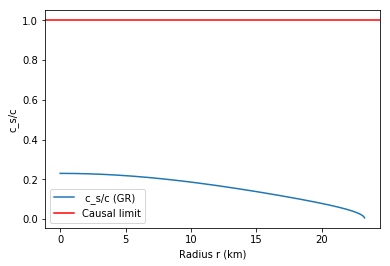

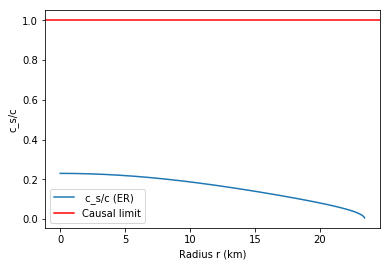

  1%|          | 1/100 [00:06<11:05,  6.72s/it]

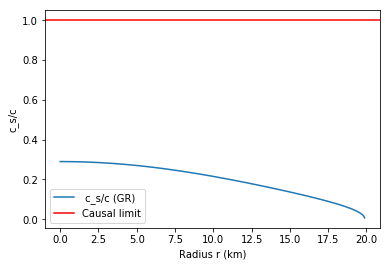

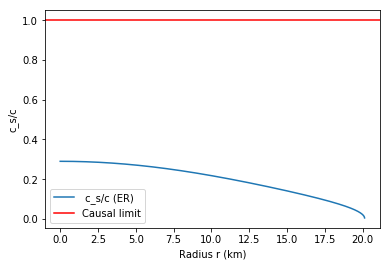

  2%|▏         | 2/100 [00:13<10:55,  6.69s/it]

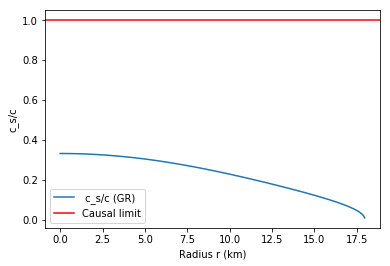

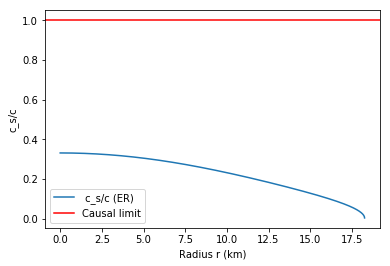

  3%|▎         | 3/100 [00:20<10:48,  6.68s/it]

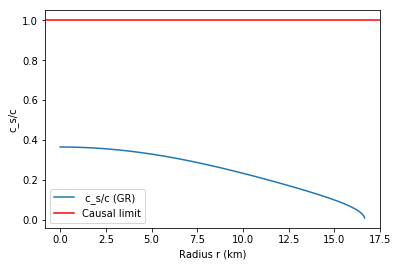

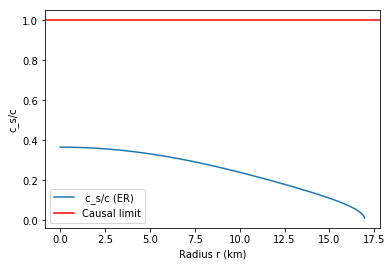

  4%|▍         | 4/100 [00:27<10:57,  6.85s/it]

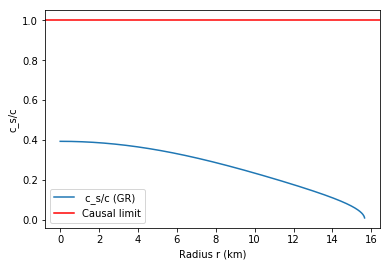

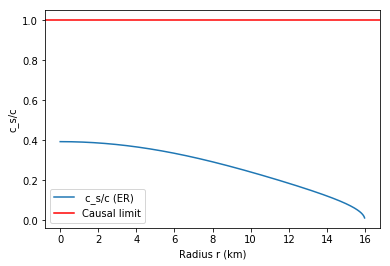

  5%|▌         | 5/100 [00:34<11:06,  7.02s/it]

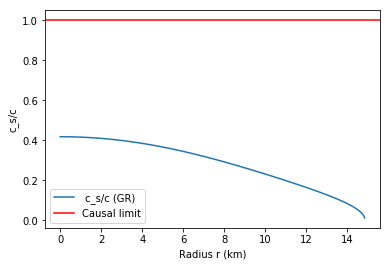

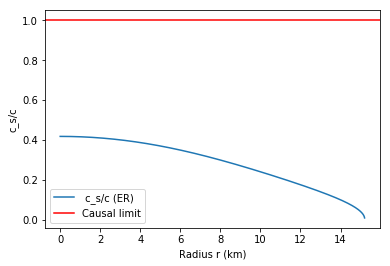

  6%|▌         | 6/100 [00:42<11:11,  7.15s/it]

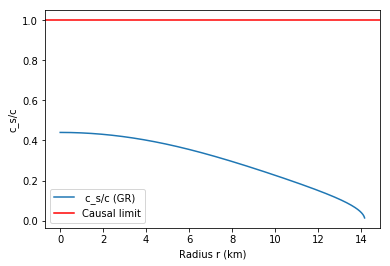

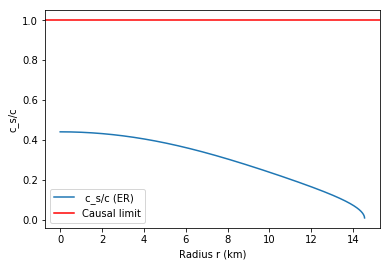

  7%|▋         | 7/100 [00:49<11:08,  7.18s/it]

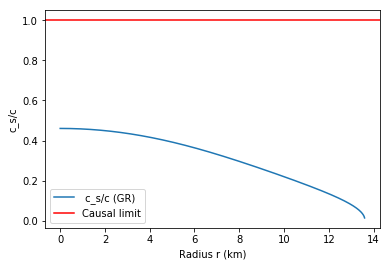

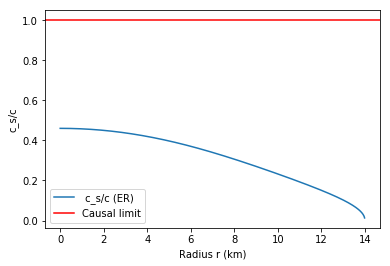

  8%|▊         | 8/100 [00:56<10:52,  7.09s/it]

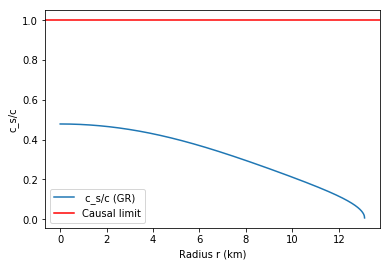

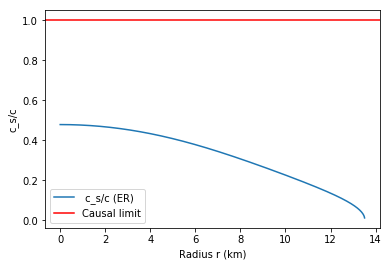

  9%|▉         | 9/100 [01:03<10:41,  7.05s/it]

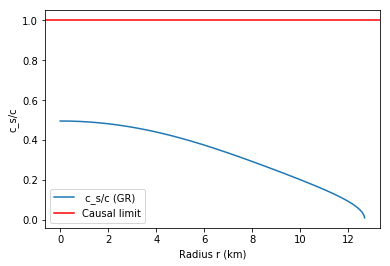

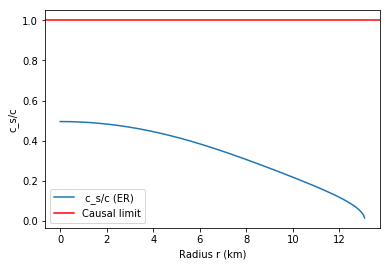

 10%|█         | 10/100 [01:10<10:35,  7.06s/it]

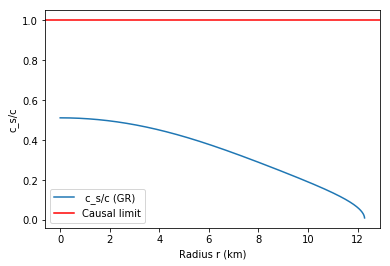

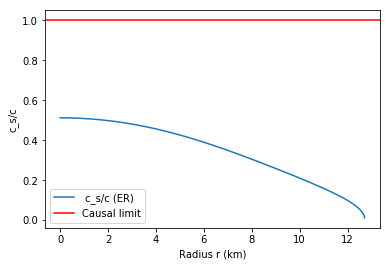

 11%|█         | 11/100 [01:17<10:28,  7.06s/it]

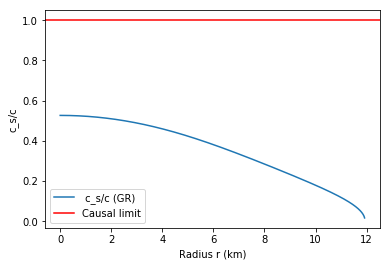

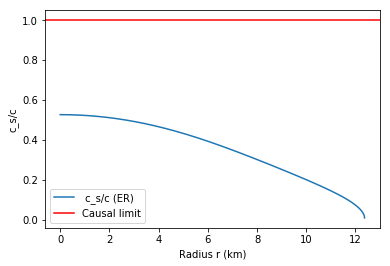

 12%|█▏        | 12/100 [01:24<10:22,  7.08s/it]

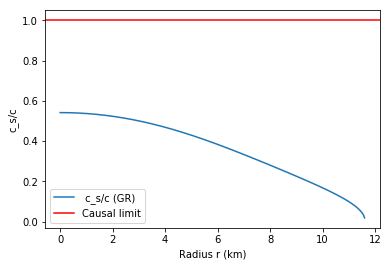

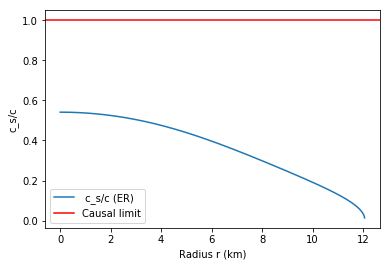

 13%|█▎        | 13/100 [01:31<10:18,  7.11s/it]

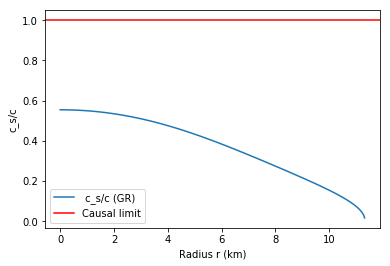

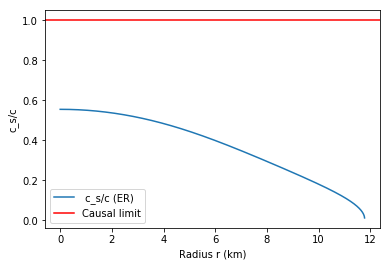

 14%|█▍        | 14/100 [01:38<10:13,  7.13s/it]

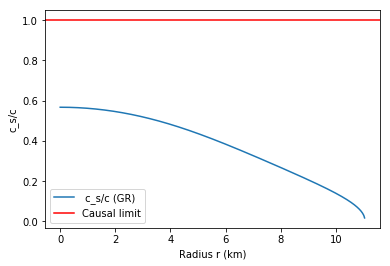

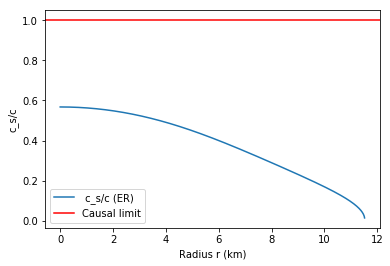

 15%|█▌        | 15/100 [01:46<10:08,  7.16s/it]

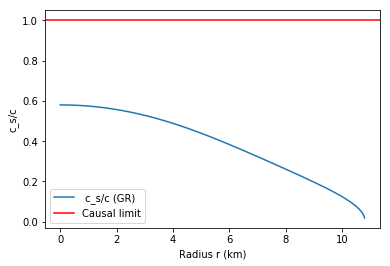

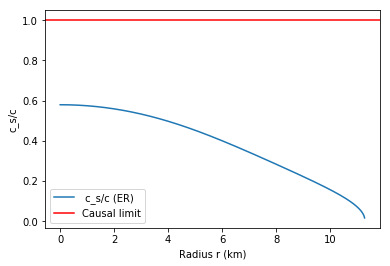

 16%|█▌        | 16/100 [01:53<09:57,  7.11s/it]

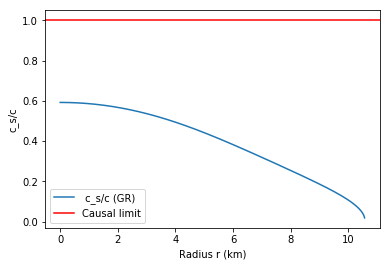

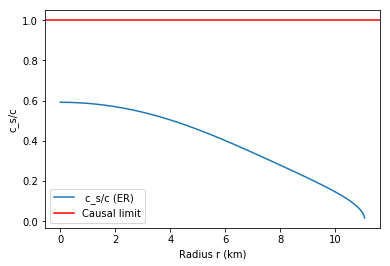

 17%|█▋        | 17/100 [02:00<09:49,  7.11s/it]

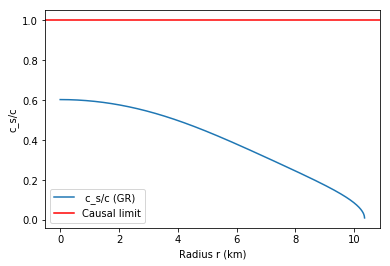

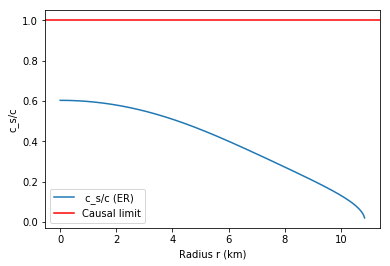

 18%|█▊        | 18/100 [02:07<09:36,  7.03s/it]

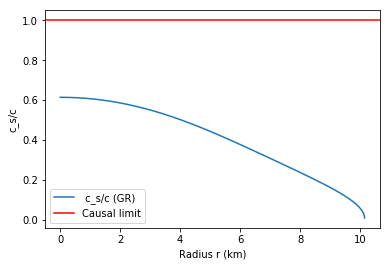

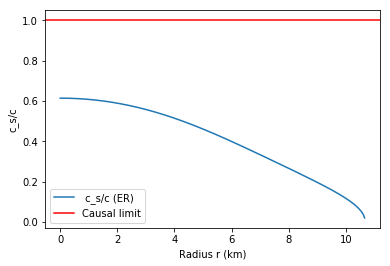

 19%|█▉        | 19/100 [02:14<09:28,  7.02s/it]

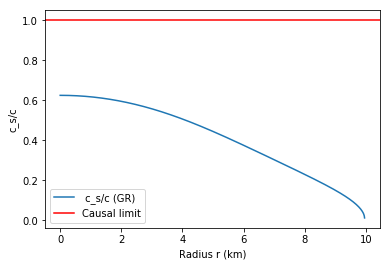

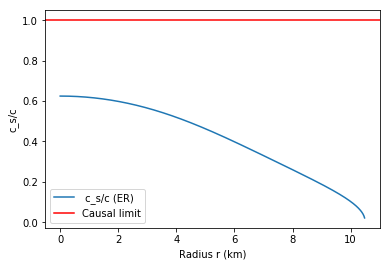

 20%|██        | 20/100 [02:21<09:33,  7.17s/it]

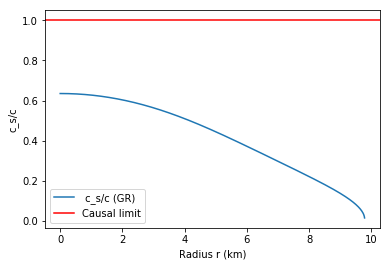

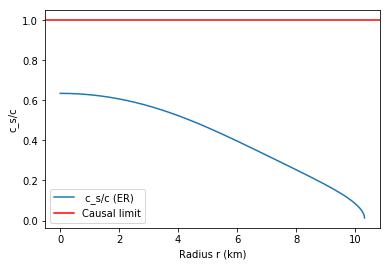

 21%|██        | 21/100 [02:29<09:34,  7.27s/it]

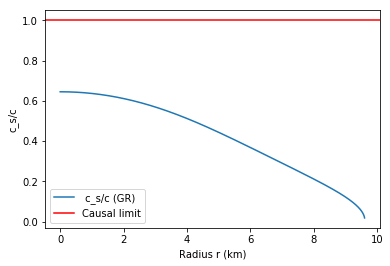

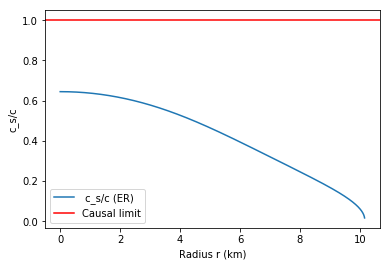

 22%|██▏       | 22/100 [02:36<09:23,  7.22s/it]

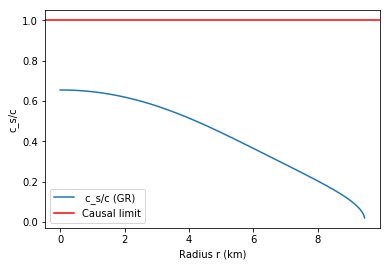

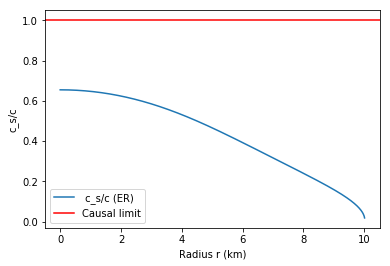

 23%|██▎       | 23/100 [02:43<09:21,  7.29s/it]

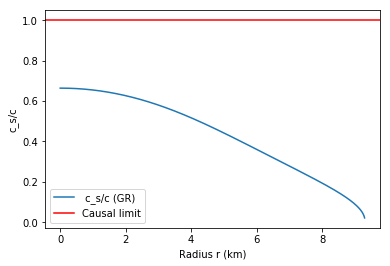

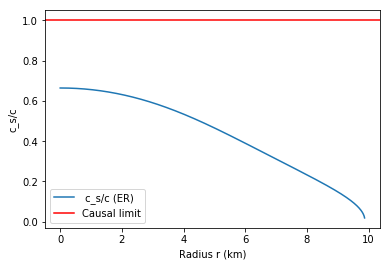

 24%|██▍       | 24/100 [02:50<09:08,  7.22s/it]

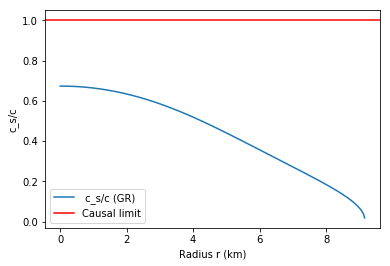

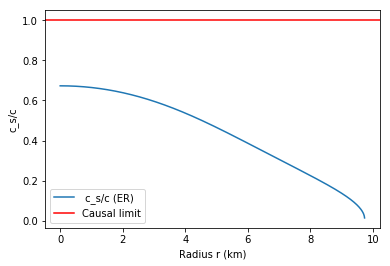

 25%|██▌       | 25/100 [02:57<08:53,  7.11s/it]

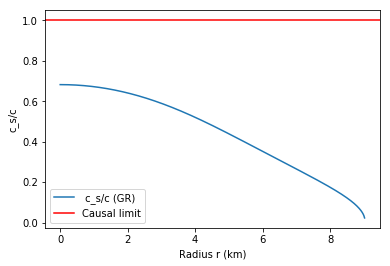

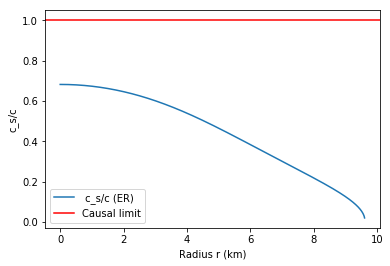

 26%|██▌       | 26/100 [03:04<08:39,  7.01s/it]

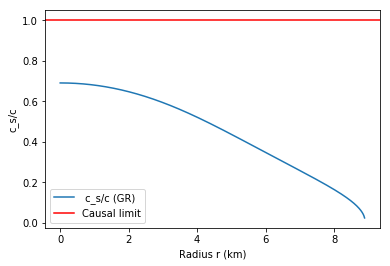

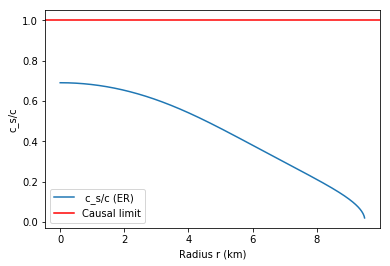

 27%|██▋       | 27/100 [03:11<08:27,  6.96s/it]

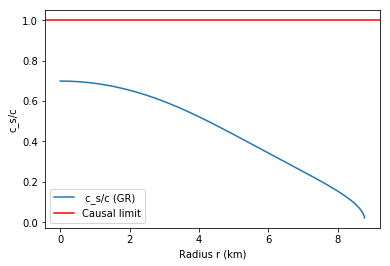

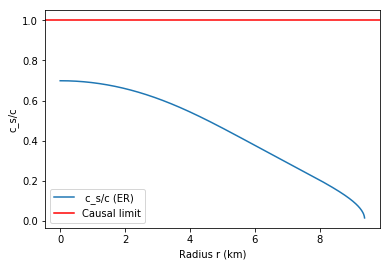

 28%|██▊       | 28/100 [03:18<08:25,  7.02s/it]

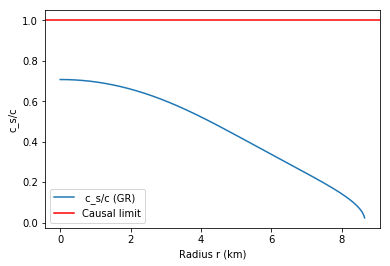

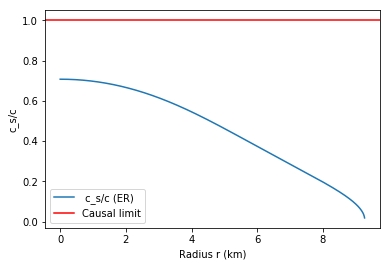

 29%|██▉       | 29/100 [03:25<08:16,  6.99s/it]

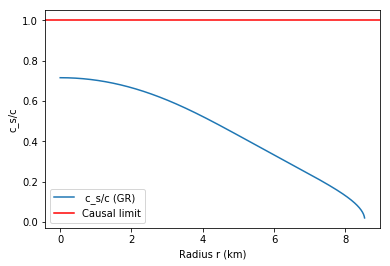

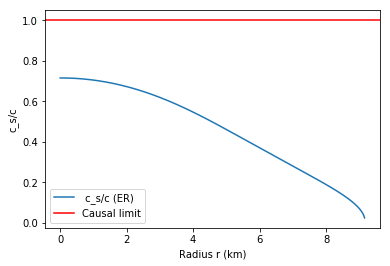

 30%|███       | 30/100 [03:32<08:09,  7.00s/it]

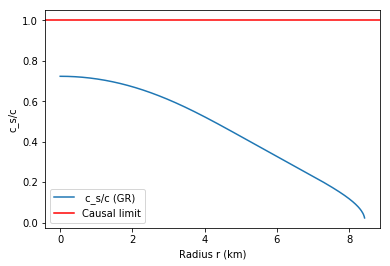

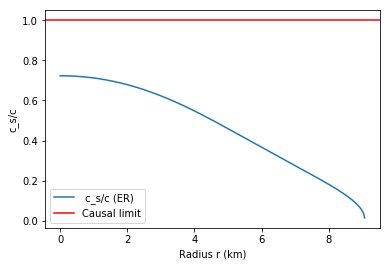

 31%|███       | 31/100 [03:39<08:09,  7.10s/it]

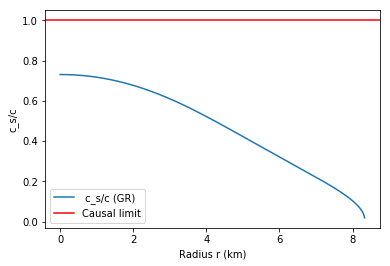

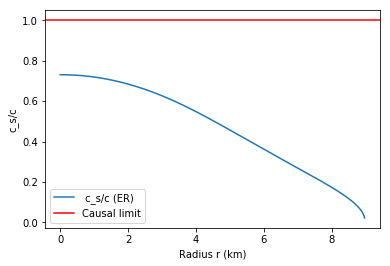

 32%|███▏      | 32/100 [03:46<08:09,  7.20s/it]

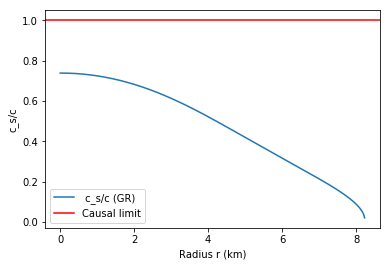

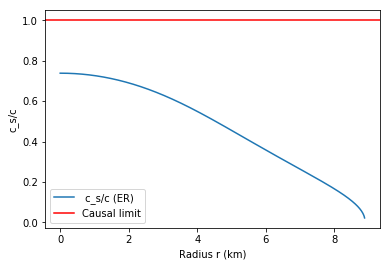

 33%|███▎      | 33/100 [03:54<08:00,  7.16s/it]

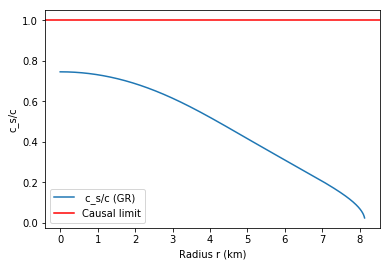

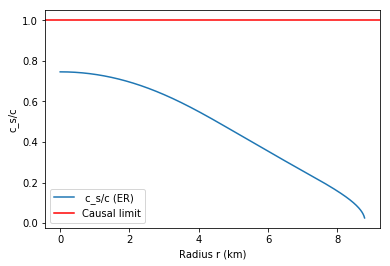

 34%|███▍      | 34/100 [04:01<07:52,  7.15s/it]

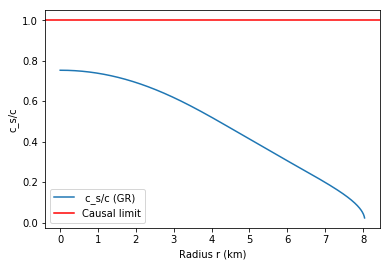

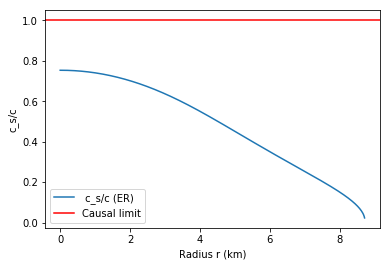

 35%|███▌      | 35/100 [04:08<07:50,  7.24s/it]

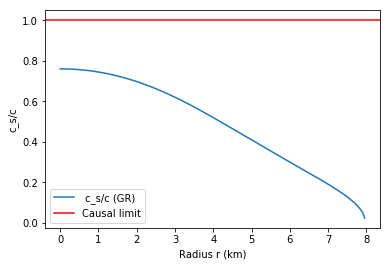

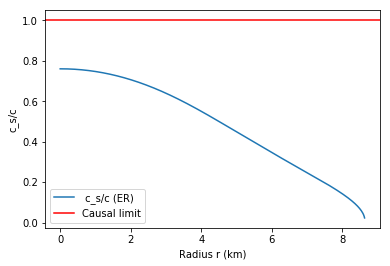

 36%|███▌      | 36/100 [04:15<07:35,  7.12s/it]

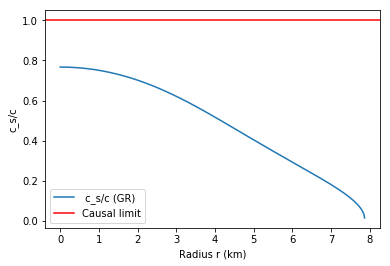

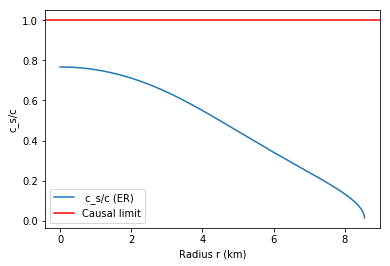

 37%|███▋      | 37/100 [04:22<07:24,  7.06s/it]

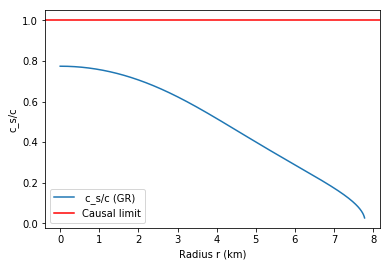

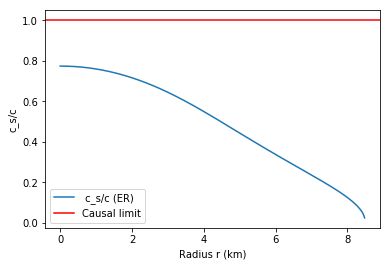

 38%|███▊      | 38/100 [04:29<07:14,  7.00s/it]

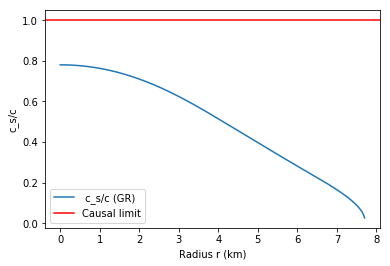

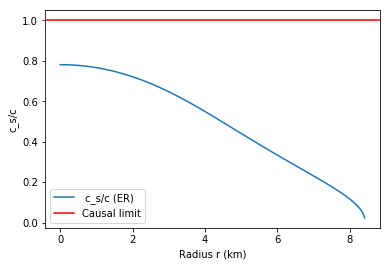

 39%|███▉      | 39/100 [04:36<07:02,  6.93s/it]

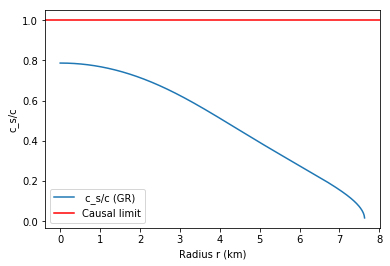

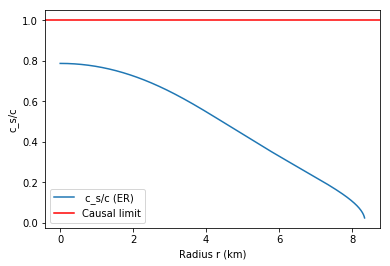

 40%|████      | 40/100 [04:42<06:53,  6.88s/it]

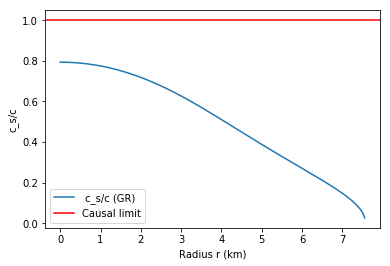

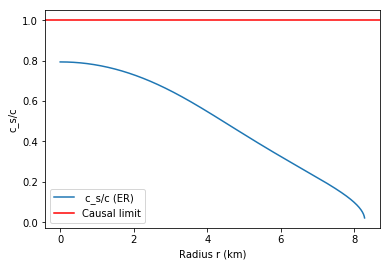

 41%|████      | 41/100 [04:49<06:45,  6.87s/it]

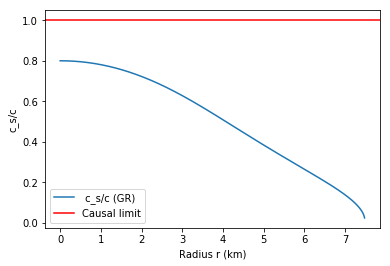

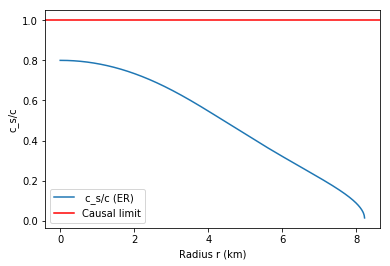

 42%|████▏     | 42/100 [04:56<06:35,  6.82s/it]

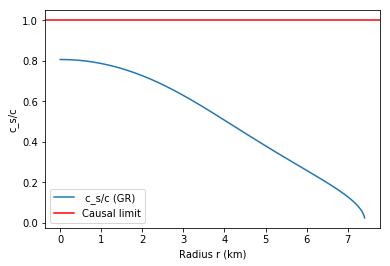

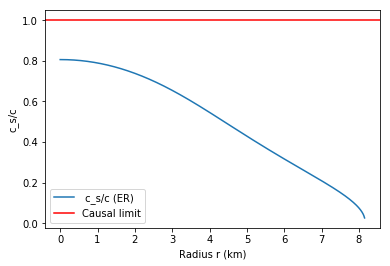

 43%|████▎     | 43/100 [05:03<06:27,  6.80s/it]

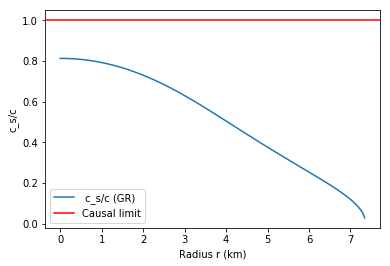

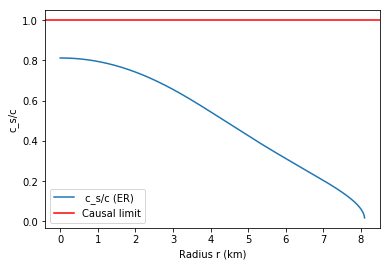

 44%|████▍     | 44/100 [05:10<06:25,  6.88s/it]

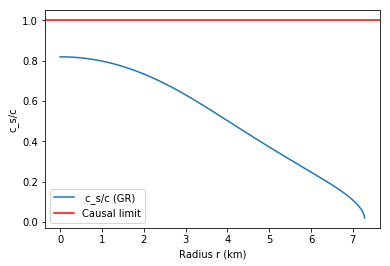

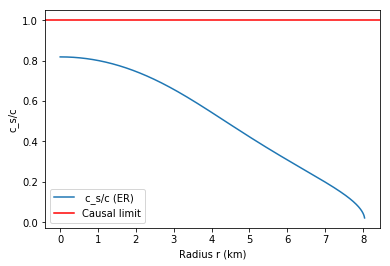

 45%|████▌     | 45/100 [05:17<06:23,  6.96s/it]

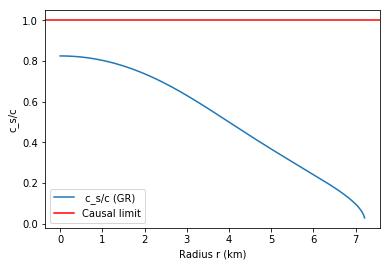

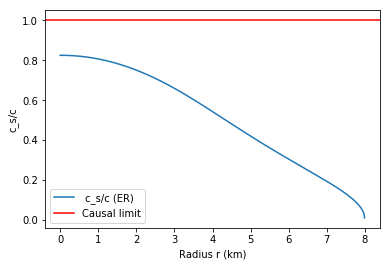

 46%|████▌     | 46/100 [05:24<06:19,  7.02s/it]

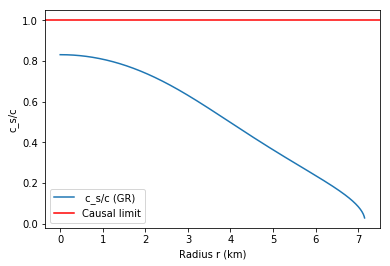

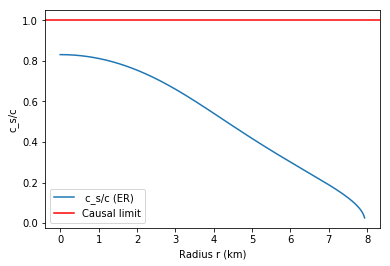

 47%|████▋     | 47/100 [05:31<06:16,  7.11s/it]

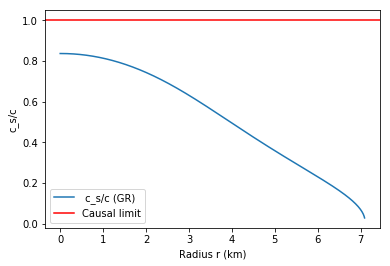

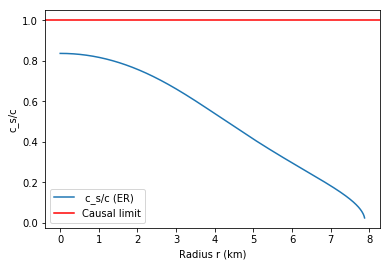

 48%|████▊     | 48/100 [05:38<06:08,  7.09s/it]

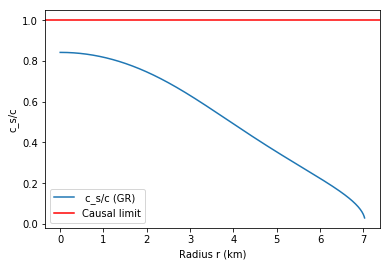

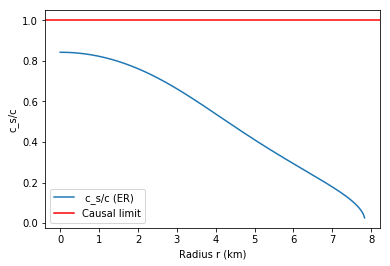

 49%|████▉     | 49/100 [05:45<05:57,  7.02s/it]

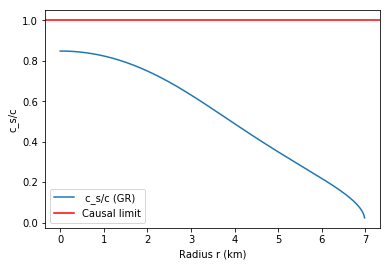

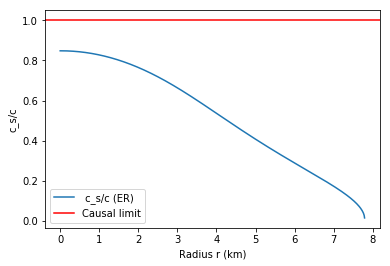

 50%|█████     | 50/100 [05:52<05:47,  6.95s/it]

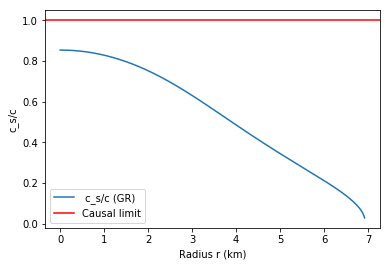

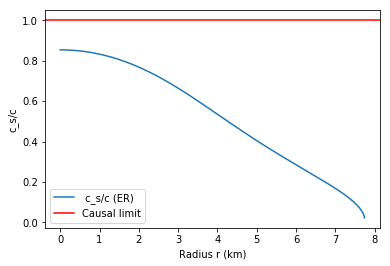

 51%|█████     | 51/100 [05:59<05:40,  6.95s/it]

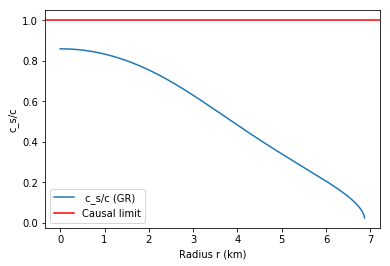

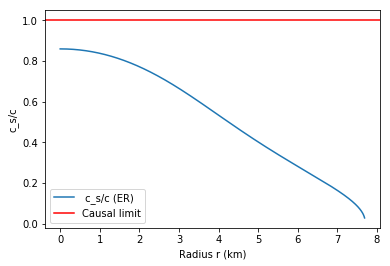

 52%|█████▏    | 52/100 [06:06<05:33,  6.95s/it]

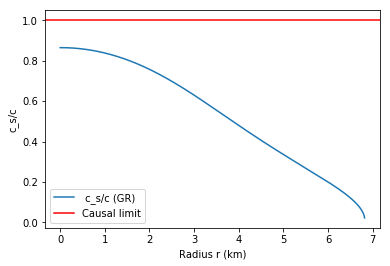

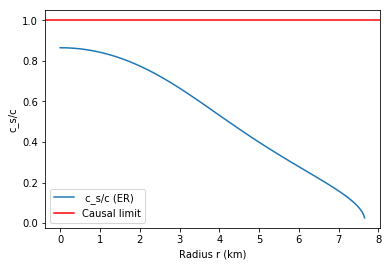

 53%|█████▎    | 53/100 [06:13<05:26,  6.94s/it]

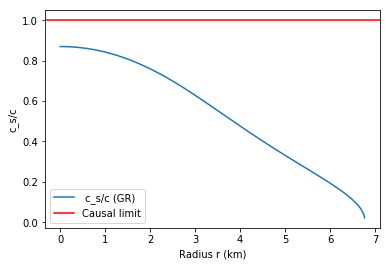

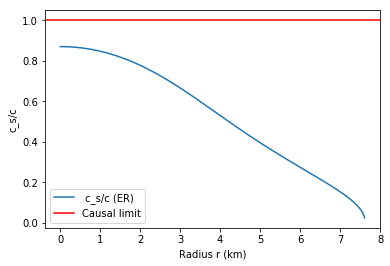

 54%|█████▍    | 54/100 [06:20<05:18,  6.91s/it]

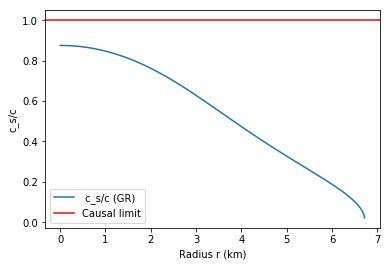

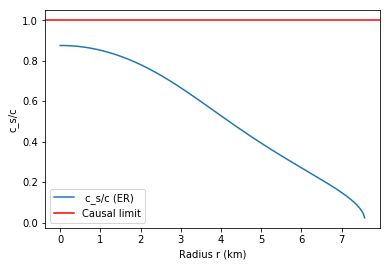

 55%|█████▌    | 55/100 [06:27<05:11,  6.91s/it]

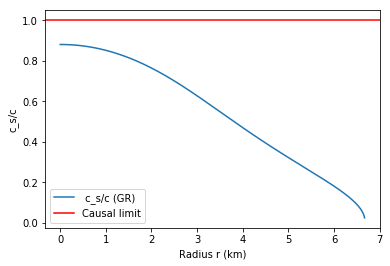

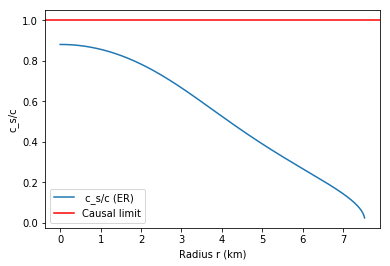

 56%|█████▌    | 56/100 [06:33<05:03,  6.90s/it]

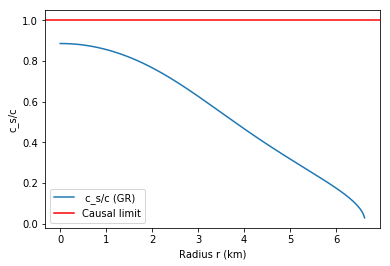

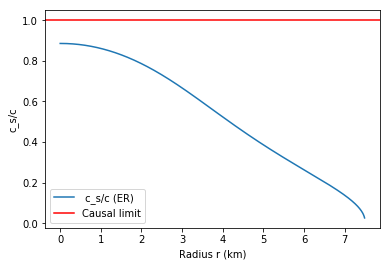

 57%|█████▋    | 57/100 [06:40<04:54,  6.86s/it]

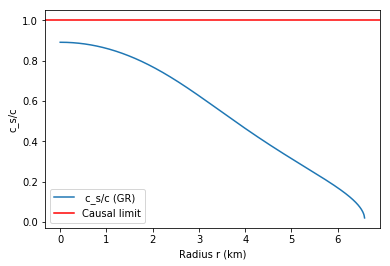

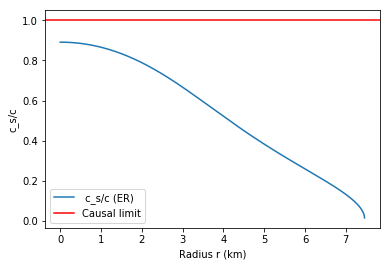

 58%|█████▊    | 58/100 [06:47<04:47,  6.84s/it]

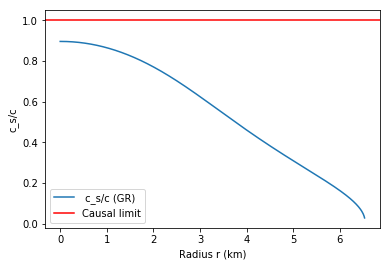

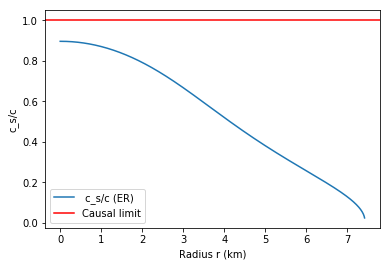

 59%|█████▉    | 59/100 [06:54<04:41,  6.87s/it]

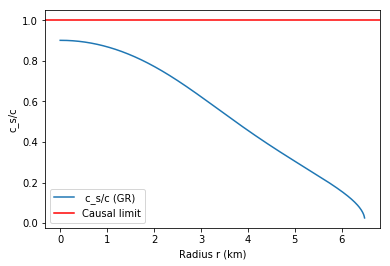

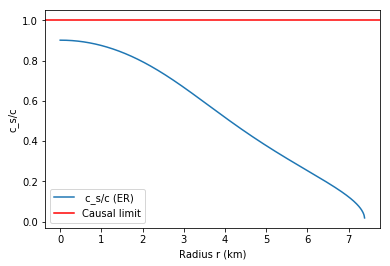

 60%|██████    | 60/100 [07:01<04:33,  6.85s/it]

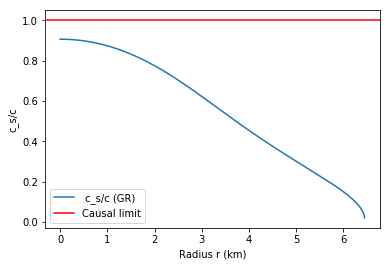

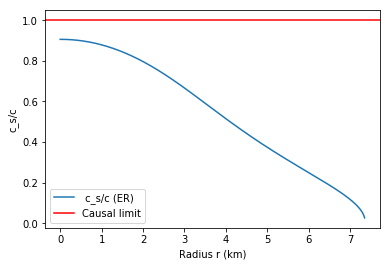

 61%|██████    | 61/100 [07:07<04:25,  6.82s/it]

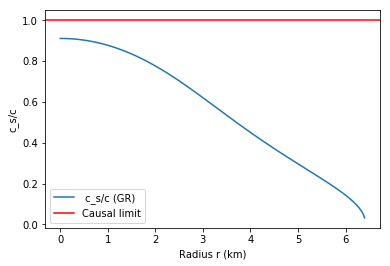

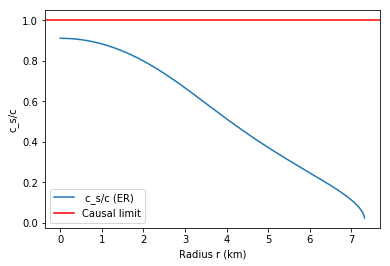

 62%|██████▏   | 62/100 [07:14<04:18,  6.81s/it]

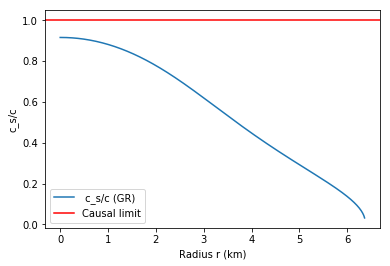

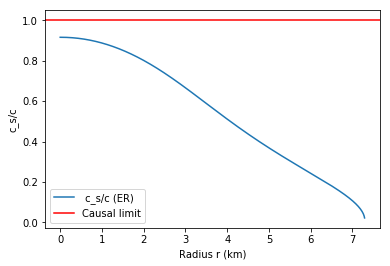

 63%|██████▎   | 63/100 [07:21<04:11,  6.79s/it]

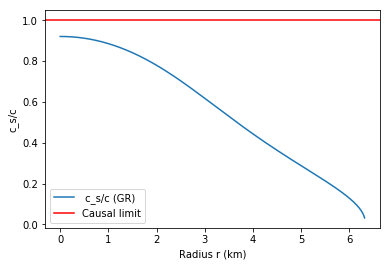

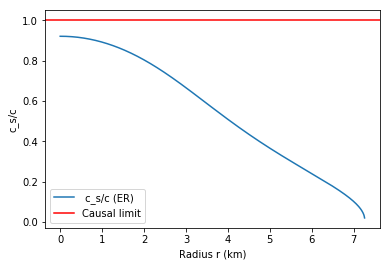

 64%|██████▍   | 64/100 [07:28<04:06,  6.84s/it]

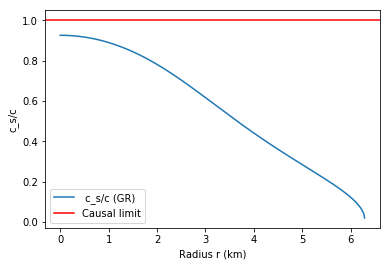

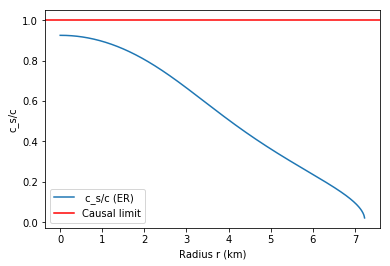

 65%|██████▌   | 65/100 [07:35<03:58,  6.83s/it]

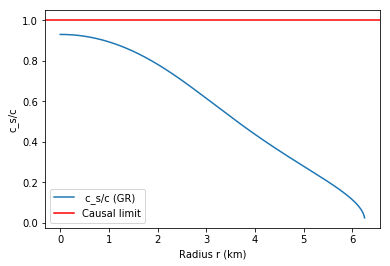

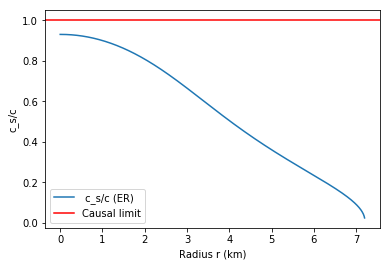

 66%|██████▌   | 66/100 [07:42<03:51,  6.82s/it]

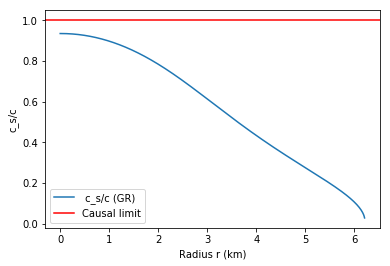

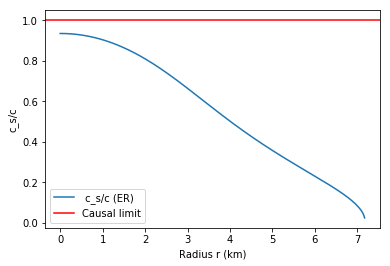

 67%|██████▋   | 67/100 [07:49<03:47,  6.90s/it]

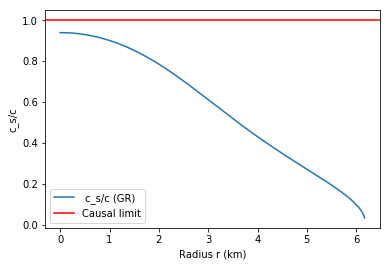

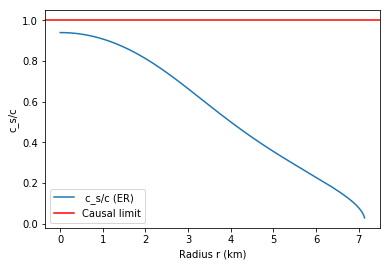

 68%|██████▊   | 68/100 [07:55<03:39,  6.86s/it]

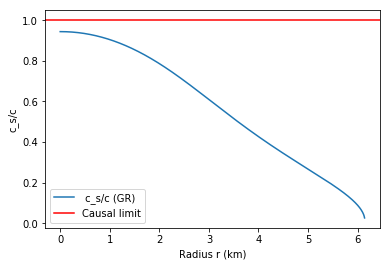

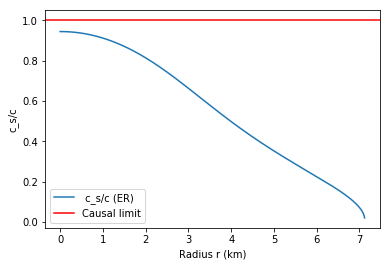

 69%|██████▉   | 69/100 [08:02<03:32,  6.86s/it]

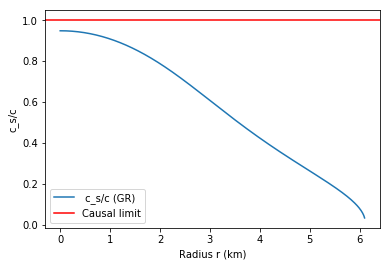

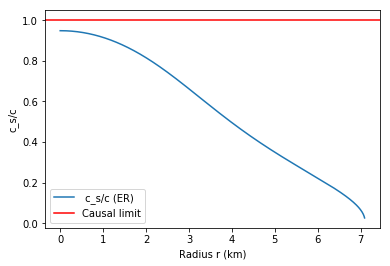

 70%|███████   | 70/100 [08:09<03:24,  6.82s/it]

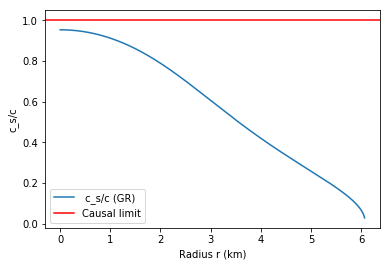

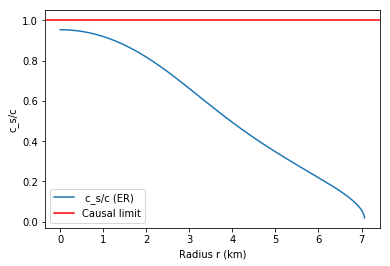

 71%|███████   | 71/100 [08:16<03:17,  6.82s/it]

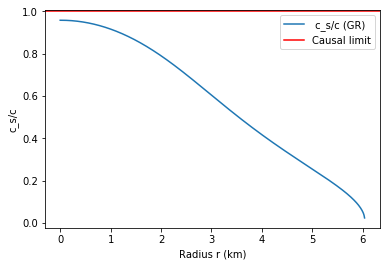

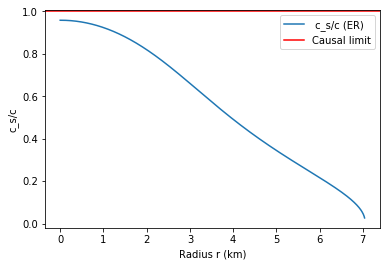

 72%|███████▏  | 72/100 [08:23<03:11,  6.85s/it]

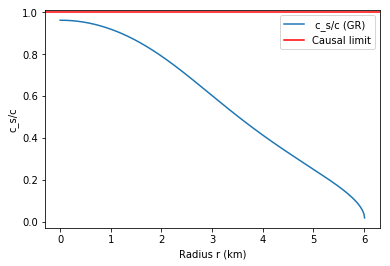

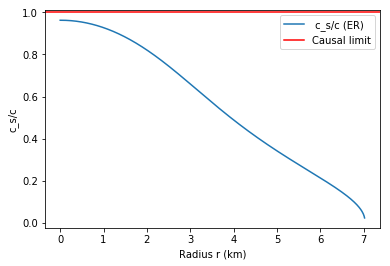

 73%|███████▎  | 73/100 [08:30<03:06,  6.91s/it]

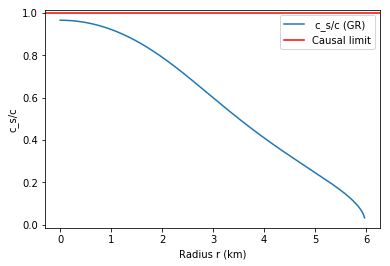

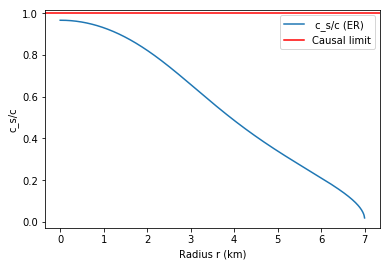

 74%|███████▍  | 74/100 [08:37<03:02,  7.02s/it]

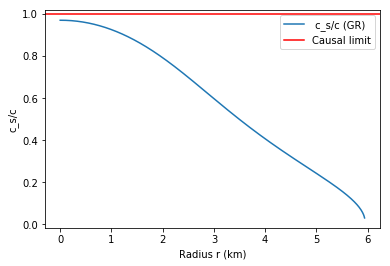

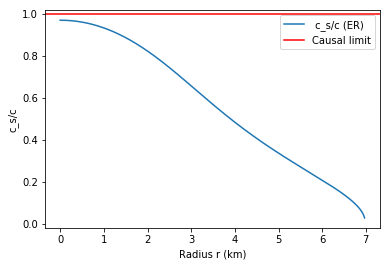

 75%|███████▌  | 75/100 [08:45<02:58,  7.16s/it]

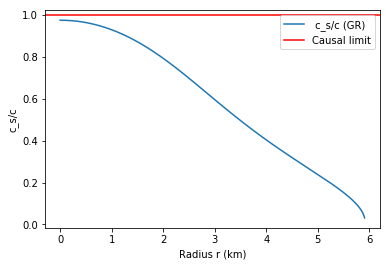

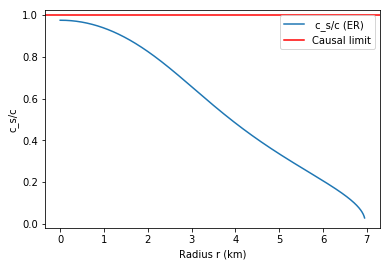

 76%|███████▌  | 76/100 [08:51<02:50,  7.09s/it]

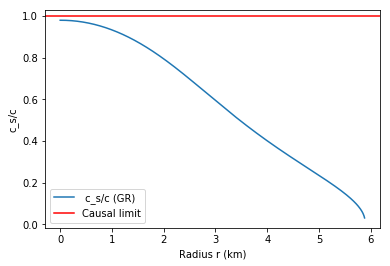

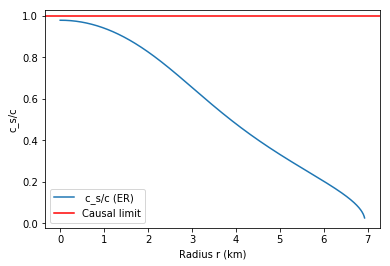

 77%|███████▋  | 77/100 [08:59<02:45,  7.19s/it]

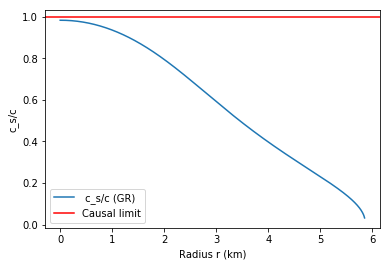

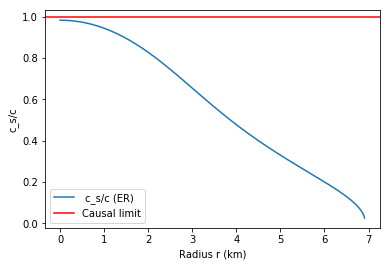

 78%|███████▊  | 78/100 [09:06<02:37,  7.17s/it]

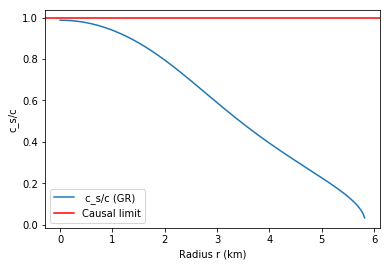

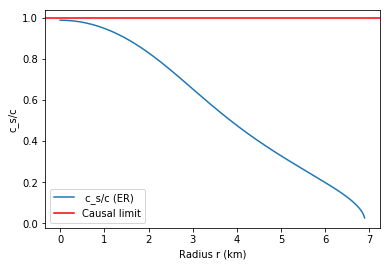

 79%|███████▉  | 79/100 [09:13<02:28,  7.07s/it]

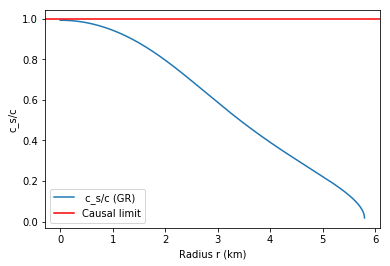

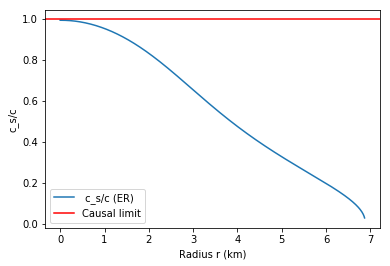

 80%|████████  | 80/100 [09:20<02:20,  7.03s/it]

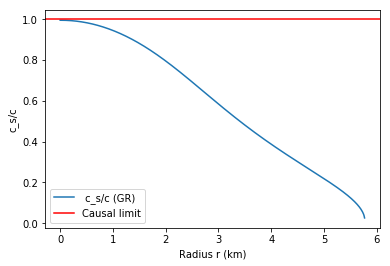

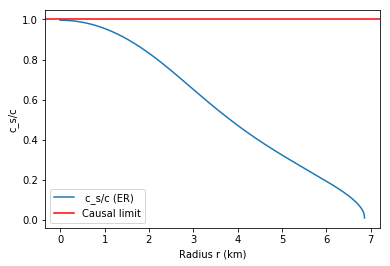

 81%|████████  | 81/100 [09:27<02:15,  7.11s/it]

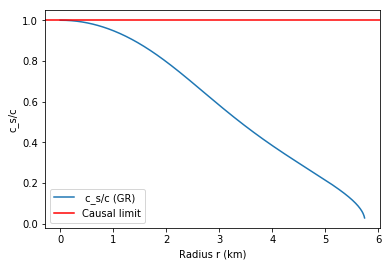

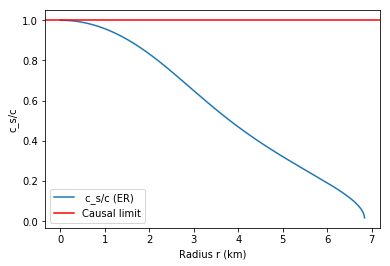

 82%|████████▏ | 82/100 [09:34<02:07,  7.10s/it]

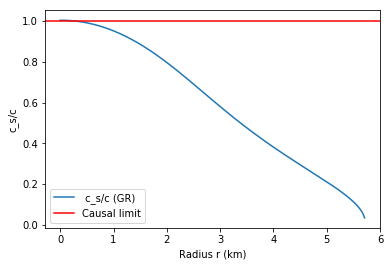

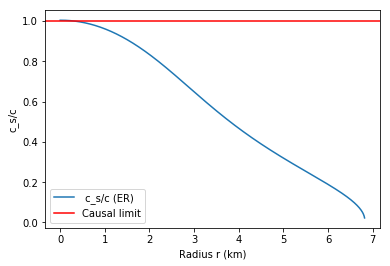

 83%|████████▎ | 83/100 [09:41<02:00,  7.08s/it]

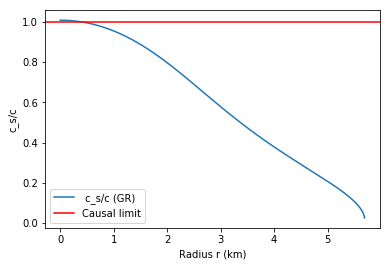

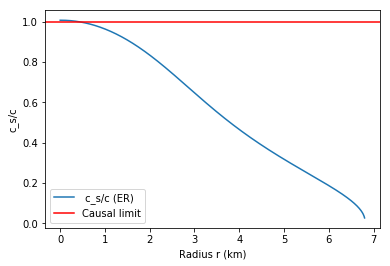

 84%|████████▍ | 84/100 [09:48<01:53,  7.11s/it]

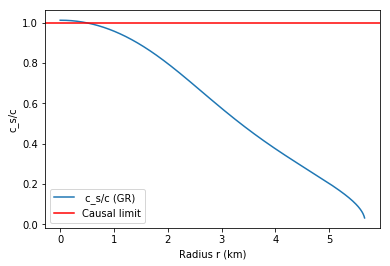

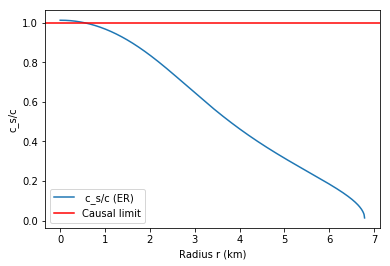

 85%|████████▌ | 85/100 [09:56<01:47,  7.17s/it]

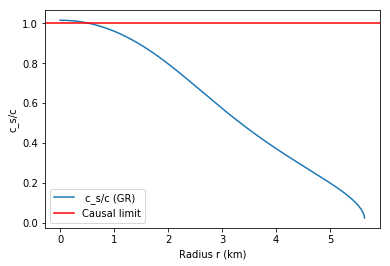

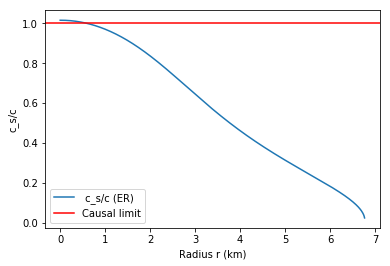

 86%|████████▌ | 86/100 [10:03<01:39,  7.10s/it]

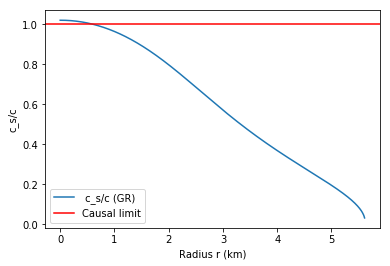

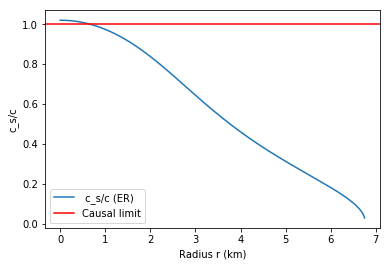

 87%|████████▋ | 87/100 [10:09<01:31,  7.02s/it]

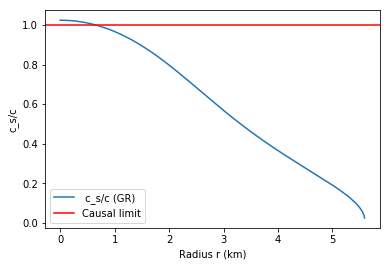

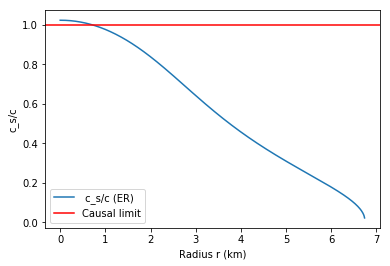

 88%|████████▊ | 88/100 [10:16<01:23,  6.97s/it]

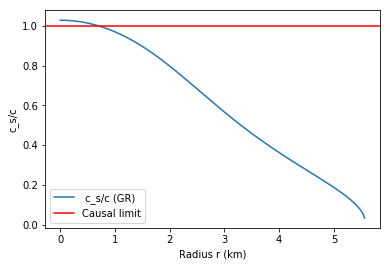

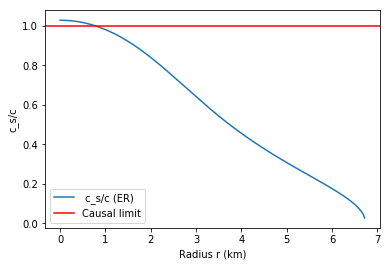

 89%|████████▉ | 89/100 [10:23<01:16,  6.97s/it]

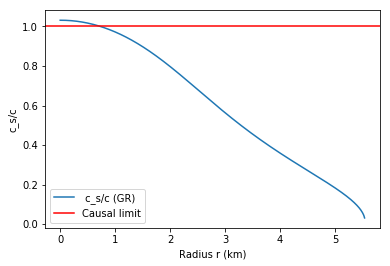

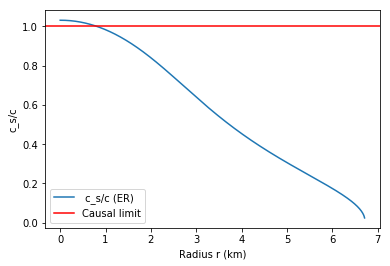

 90%|█████████ | 90/100 [10:30<01:09,  6.96s/it]

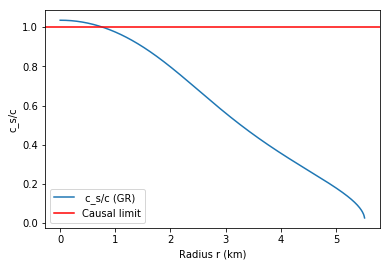

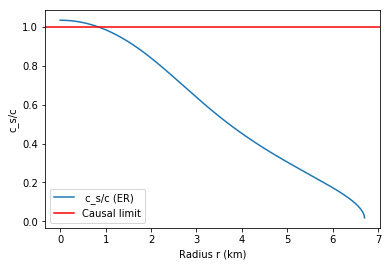

 91%|█████████ | 91/100 [10:37<01:02,  6.94s/it]

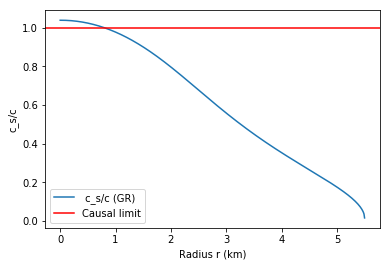

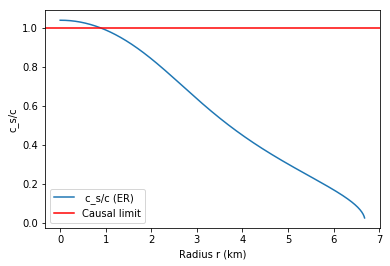

 92%|█████████▏| 92/100 [10:44<00:55,  6.90s/it]

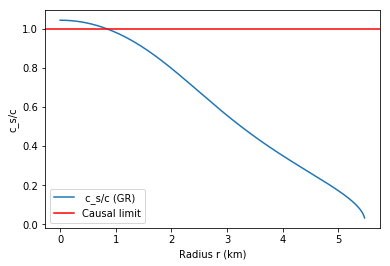

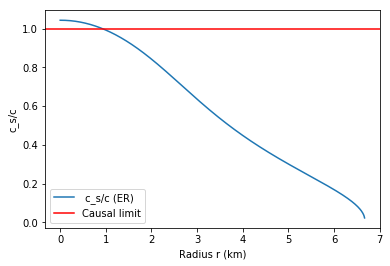

 93%|█████████▎| 93/100 [10:51<00:48,  6.91s/it]

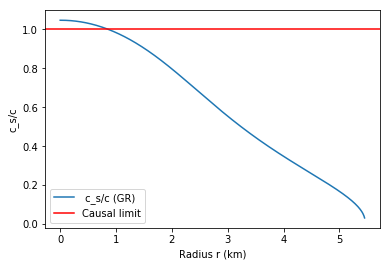

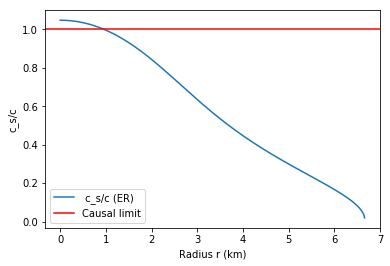

 94%|█████████▍| 94/100 [10:58<00:41,  6.96s/it]

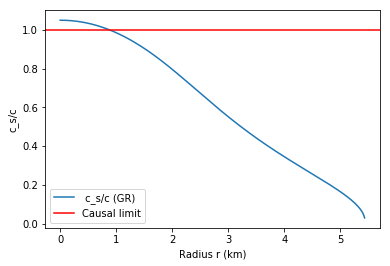

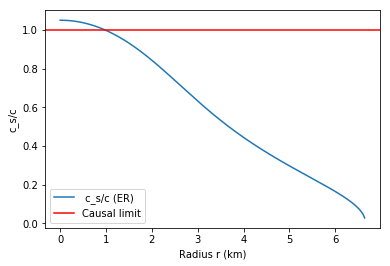

 95%|█████████▌| 95/100 [11:05<00:34,  6.94s/it]

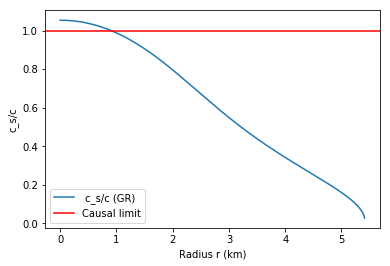

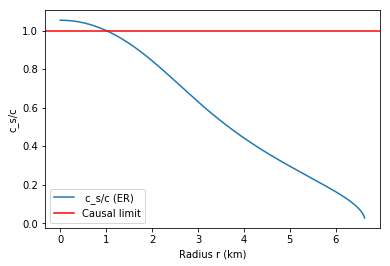

 96%|█████████▌| 96/100 [11:12<00:27,  6.91s/it]

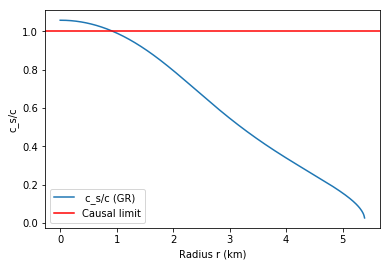

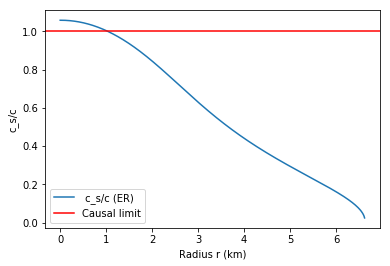

 97%|█████████▋| 97/100 [11:19<00:20,  6.96s/it]

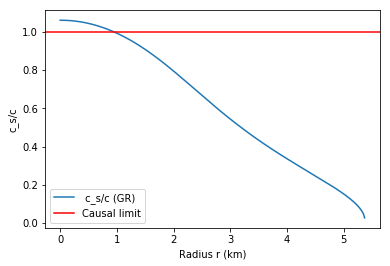

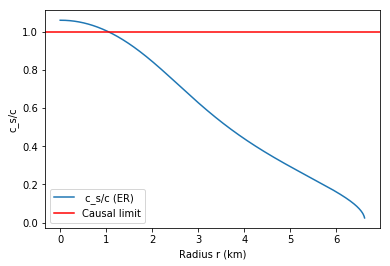

 98%|█████████▊| 98/100 [11:26<00:13,  6.99s/it]

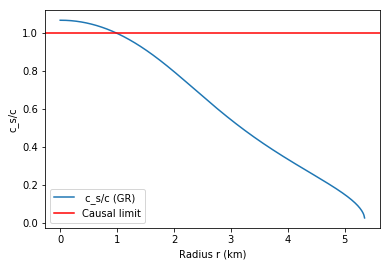

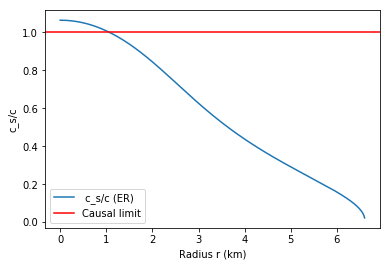

 99%|█████████▉| 99/100 [11:33<00:06,  6.95s/it]

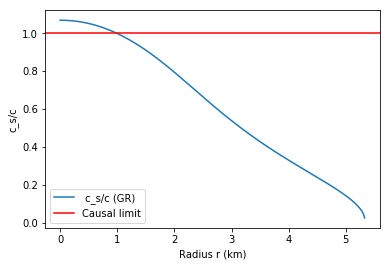

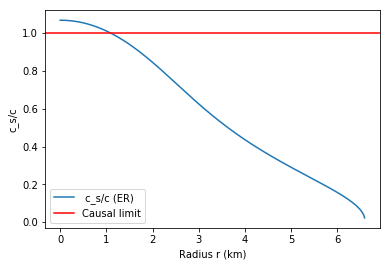

100%|██████████| 100/100 [11:40<00:00,  6.97s/it]


In [6]:
for dens in tqdm(range(100,10001,100)):
    test_dilaton(dens, 1, precision, pas)

In [7]:
# faire plots jusqu'à 40 000 ~ 1 heure